importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

reading the data

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The dataset contains the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.
The dataset contains both categorical and numerical columns. Here "fraud_reported"is our traget column, since it has two categories so it termed to be "Classification Problem"where we need predict if an insurance claim is fraudulent or not.

Exploratory Data Analysis

Checking the shape of the dataset
per the observation there are 1000 rows and 40 coloumns

In [4]:
df.shape 

(1000, 40)

Checking the list of columns in our data

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Checking the data types in our dataset

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

As per the observation we have 3 types of datatypes ie integer,float and object

Checking the info about data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

As per the above we can see that there are many coloumns have null values

Checking the null values counts

In [8]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Checking the statistical properties of dataset

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Checking if there are any duplicate columns

In [10]:
df.duplicated().sum()

0

There are no duplicate values

Checking the number of unique values

In [11]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Policy number and incident location are unique columns and have unique values this will not effect much so we wil drop this

In [12]:
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

Checking the unique values of the police report

In [13]:
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

per checking the above we can see that there is 1 more response except YES or No i.e. ? we need to imput this

In [14]:
df.replace('?',np.NaN,inplace=True)

In [15]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Data Imputation

Checking for the missing values

In [16]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                   

Wecan see that _c39 have 1000 null values means it does not have nay relevent infomrtaion hence we will remove it

dropping '_c39'column

In [17]:
df.drop(['_c39'],axis=1,inplace=True)

Lets fill the null values for collision type.

In [18]:
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

Lets use mode method to fill this Nan values.

In [19]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

Lets fill the null values for property_damage.

In [20]:
df.property_damage.unique()

array(['YES', nan, 'NO'], dtype=object)

In [21]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

Lets fill the null values for police_report_available

In [22]:
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

Lets again use mode methord to fill this Nan values

In [23]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

Again checking the missing values

In [24]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

There are no null values

policy_bind_date have datatypes of object lets convert into datetime datatype

In [25]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['Month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['Year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['Day'] = df['policy_bind_date'].dt.day

Dropping the policy_bind_date as its not required

In [26]:
df.drop(['policy_bind_date'],axis=1,inplace=True)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


Checking the statistical data of the dataset

In [27]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Month,Year,Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,6.559000,2001.604000,15.448000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,3.391758,7.360391,8.850176
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1.000000,1990.000000,1.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,4.000000,1995.000000,8.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,7.000000,2002.000000,16.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,9.000000,2008.000000,23.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,12.000000,2015.000000,31.000000


The data present in the database is from year 1990 to 2015 as pe rthe observation.
The minimum age of the customer is 19 years.
The maximum amount of claim is 114920 in data we have minimum 1 witness and maximum 3.


Data Visualization

Univariate Analysis

<AxesSubplot:ylabel='fraud_reported'>

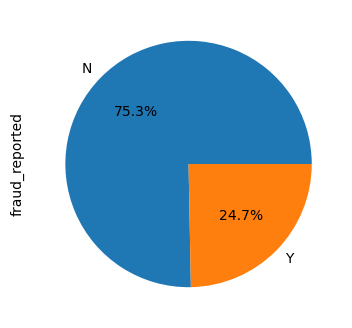

In [28]:
df['fraud_reported'].value_counts().plot.pie(figsize = (5,4),autopct = '%.1f%%')

From the above pie chart we can see that almost around 25% are fraud reported cases

<AxesSubplot:ylabel='police_report_available'>

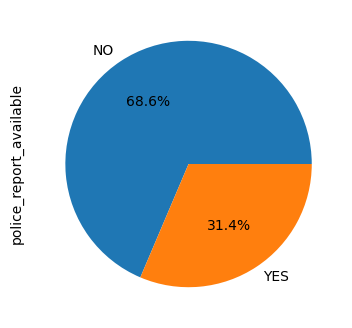

In [29]:
df['police_report_available'].value_counts().plot.pie(figsize = (5,4), autopct = '%.1f%%')

From the above pie chart we can see that for 31.4 % cases police_report is available and for 68.65% it is not

<AxesSubplot:ylabel='insured_sex'>

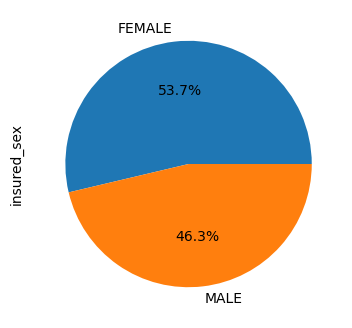

In [30]:
df['insured_sex'].value_counts().plot.pie(figsize = (5,4), autopct = '%.1f%%')

From the above pie chart we can see that 53.7% female have reported for claim and 46.3%male

<AxesSubplot:ylabel='incident_type'>

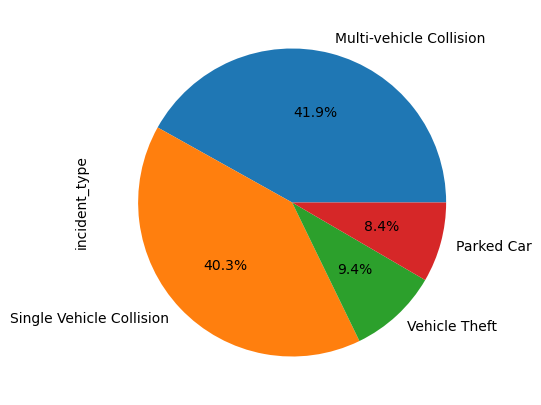

In [31]:
df['incident_type'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

From the above pie chart we can see that most of the cases reported are for single vehicle collision i.e. 40.3% and very least for parkedcar i.e, 8.4%

<AxesSubplot:ylabel='authorities_contacted'>

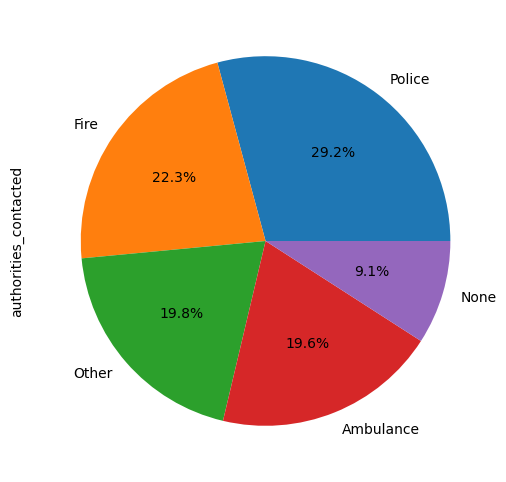

In [32]:
df['authorities_contacted'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

29.2% of the claimers have contacted police. Only 9.1% have not contacted any authorities.

<AxesSubplot:ylabel='witnesses'>

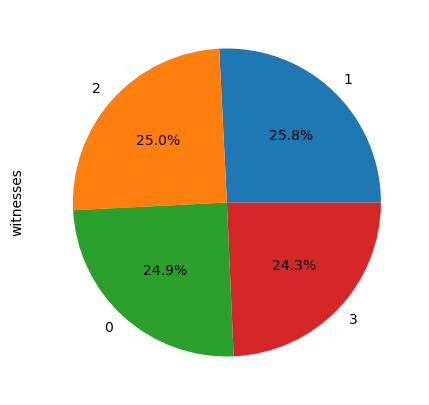

In [33]:
df['witnesses'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

Fromt the above pie chart we can see that almost all the witnesses are equally divided

<AxesSubplot:ylabel='incident_state'>

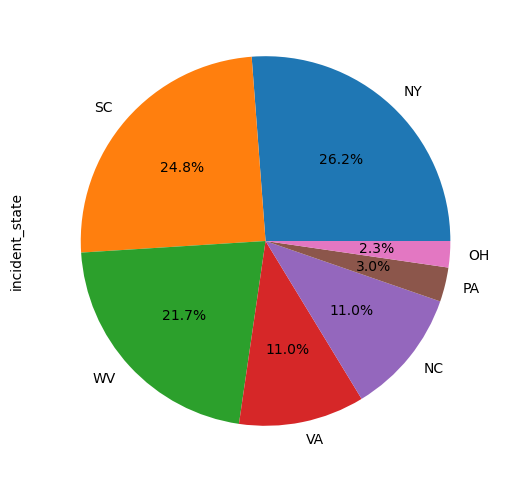

In [34]:
 df['incident_state'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Most of the claims are reported from NY,SC,WV and least were from OH,PA/

<AxesSubplot:ylabel='incident_city'>

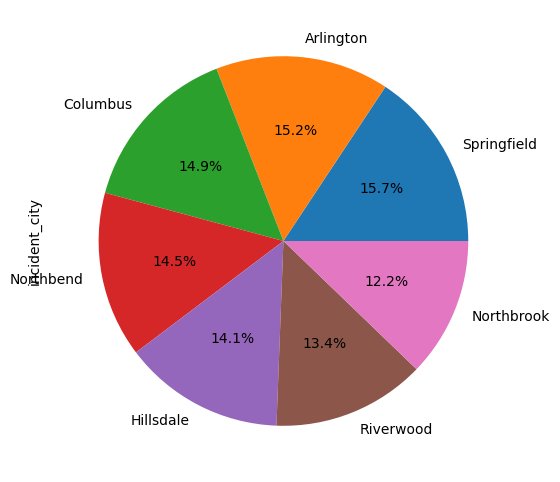

In [35]:
df['incident_city'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Majority of the claims are from city Springfiels and Arlington and least from Northbrook.

Bivariate Analysis

Checking the police report available using plotbar 

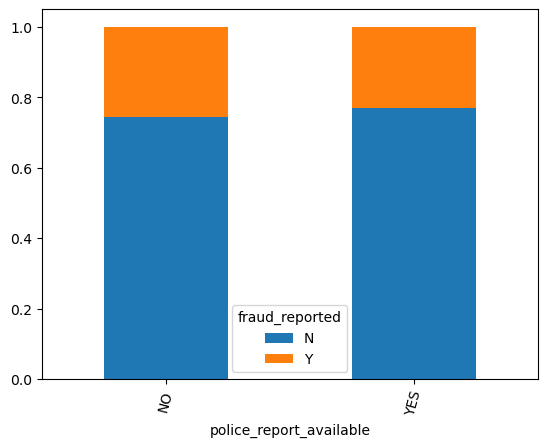

In [36]:
ct = pd.crosstab(df.police_report_available, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Per the above barplot we can see that there are many cases where police report is not available.

Checking if there is any corelation between education level and person doing fraud. using bar chart

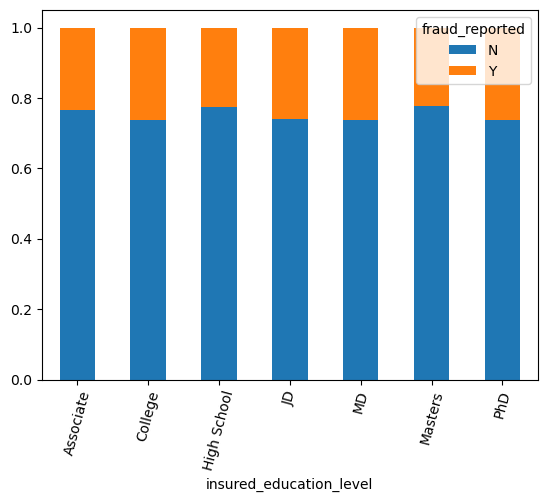

In [37]:
ct = pd.crosstab(df.insured_education_level, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

From the above bar chart we can see that there no corelation 

Checking if sex has any relation with Fraud

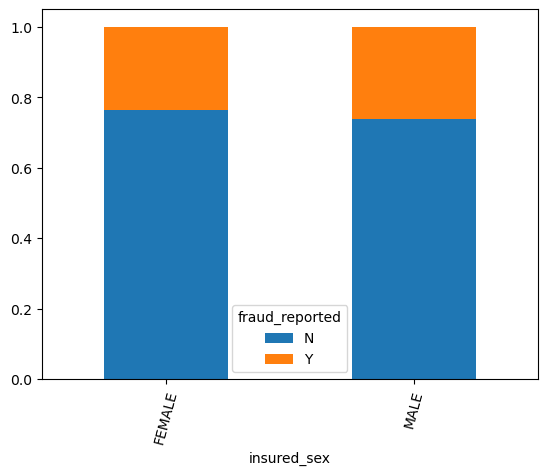

In [38]:
ct = pd.crosstab(df.insured_sex, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

From the above bar chart we can see that there is no much difference

Checking if relationship has any chance of fraud.

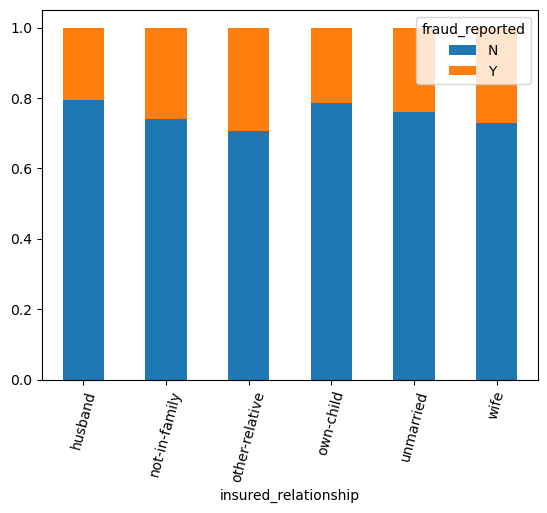

In [39]:
ct = pd.crosstab(df.insured_relationship, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

From the above bar chart we can see that orther relative,unmarried,not in family have chances of fraud

Checking if hobbies has any chance of fraud.

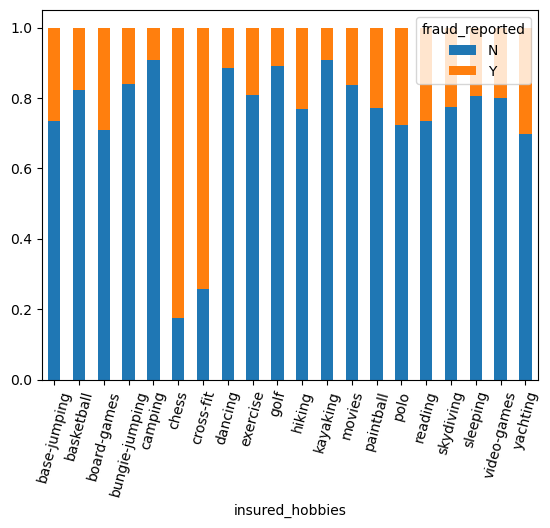

In [40]:
ct = pd.crosstab(df.insured_hobbies, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

From the above chart we can see that people who have hobbies like Chess and crossfit has the more chances of claiming fraud compared to kayaking,camping and others

Checking if incident type as any chance of claiming fraud.

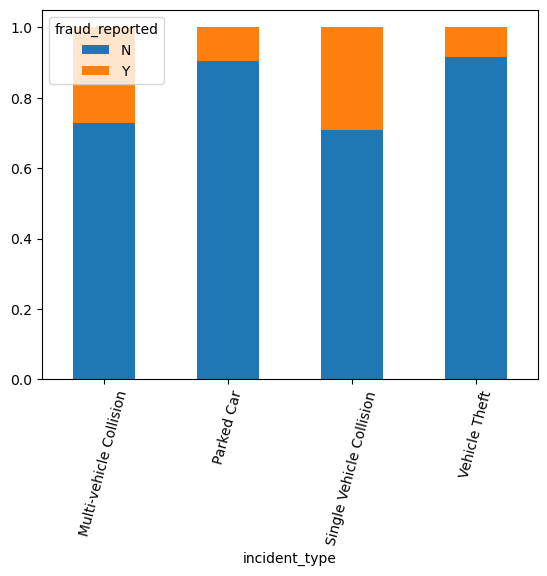

In [41]:
ct = pd.crosstab(df.incident_type, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

From the above bar chart incident type like parked car and vehiccal theft has less chances of clamimg the fraud

Plotting histogram to see all the relations

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>],
       [<AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>,
        <AxesSubplot:title={'center':'witnesses'}>],
       [<AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>,
        <AxesSubplot:title={'center':'vehicle_claim'}>],
       [<AxesSubplot:title={'center':'auto_year'}>,
        <AxesSu

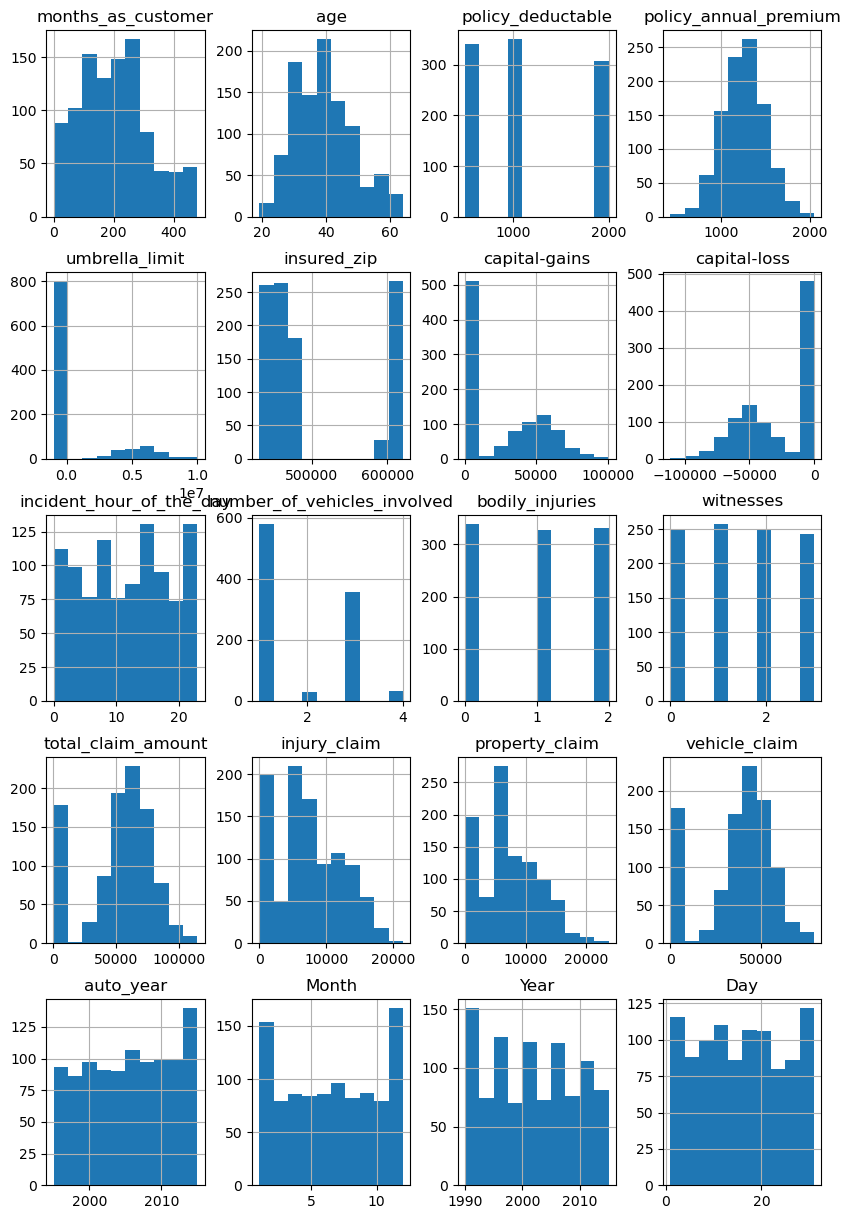

In [42]:
df.hist(figsize=(10,15))

As per the aboce chart we can see that data is normally distributed

Checking the corelation using heatmap

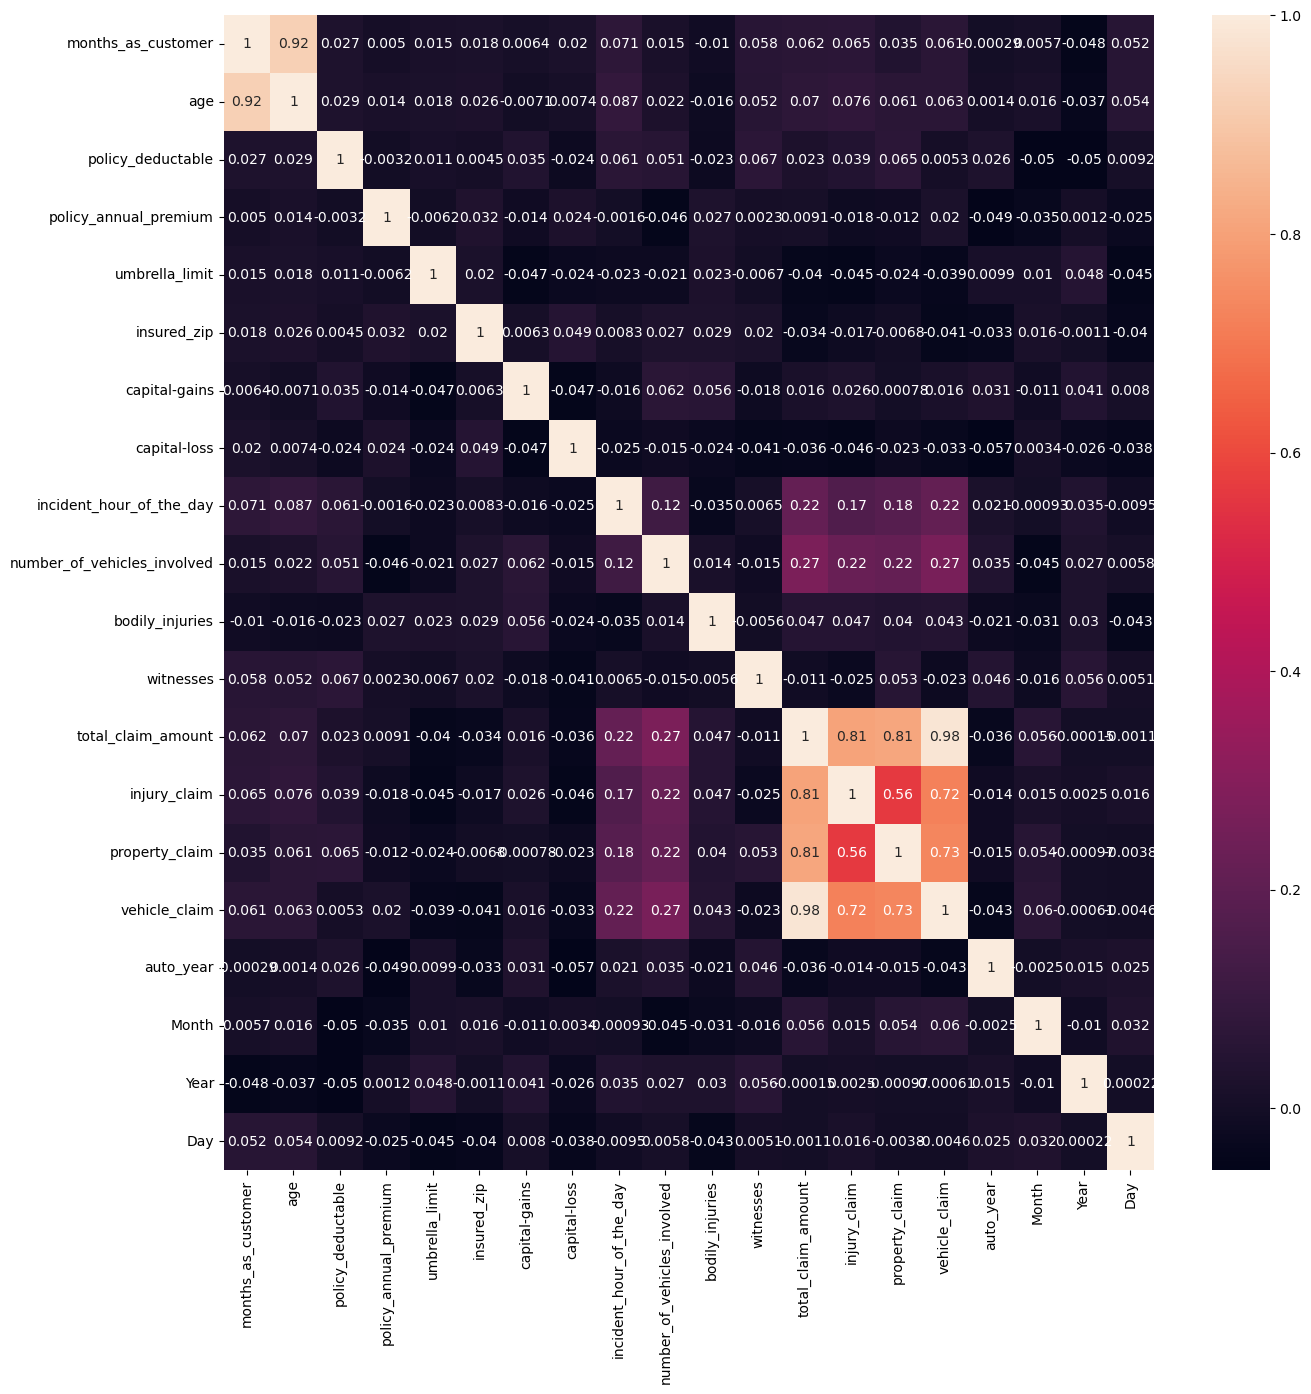

In [43]:
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True)
plt.show()

Total_claim_amount, injury_claim, property_claim and Vehicle_claim are highly corelated with each other.

Checkinng for the outliers

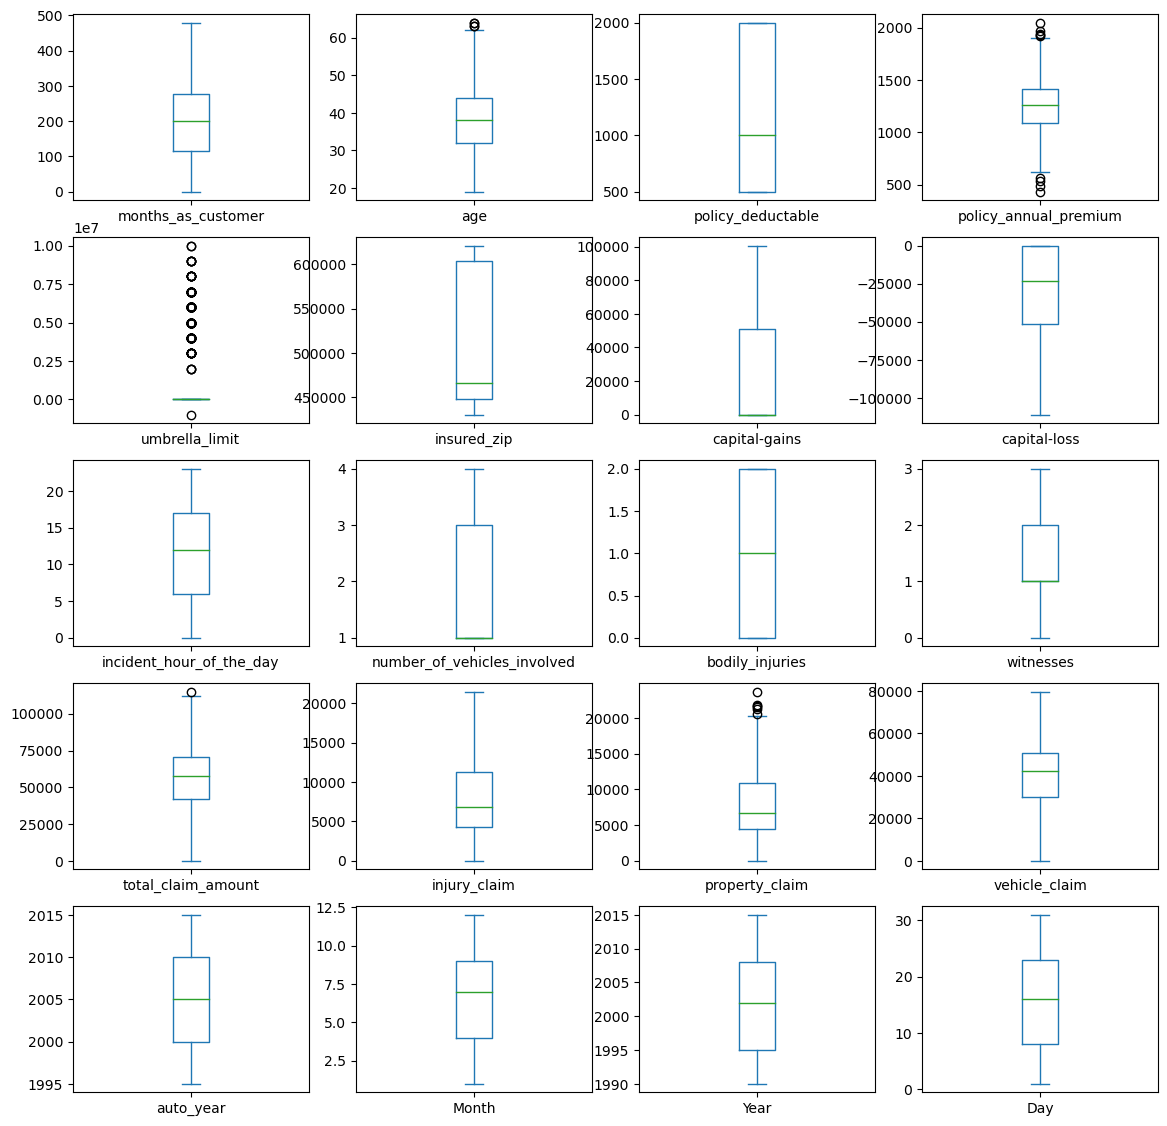

In [44]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(14,14))
plt.show()

From the above chart we can see that umbrella limit and property claim has the outliers

Removing the outliers

Removing the outliers from property claims

In [45]:
df[df["property_claim"]>20000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
163,112,30,OH,500/1000,1000,1166.54,0,479852,FEMALE,Masters,...,10790,21580,75530,Dodge,Neon,1997,Y,9,2002,13
299,119,27,IN,250/500,2000,1097.64,0,614812,MALE,High School,...,7080,21240,35400,Accura,TL,2006,N,5,1997,8
301,107,31,IL,100/300,2000,1018.73,5000000,469646,MALE,Associate,...,14420,21630,57680,Honda,CRV,2001,N,11,1994,25
421,147,37,IN,250/500,1000,1306.78,0,466818,MALE,MD,...,13520,20280,47320,Toyota,Camry,1995,N,2,1992,10
500,1,29,OH,500/1000,500,854.58,0,612826,FEMALE,JD,...,7890,23670,55230,Honda,CRV,2003,N,5,2006,24
591,43,43,IL,500/1000,500,1320.39,0,604861,FEMALE,Associate,...,7270,21810,50890,Honda,CRV,1996,Y,7,1997,11
687,194,41,IL,250/500,500,1203.81,0,613119,MALE,JD,...,13700,20550,61650,Saab,95,1999,N,2,1993,15
745,258,41,IL,100/300,500,1042.25,0,601206,MALE,Masters,...,6770,20310,54160,Mercedes,C300,2008,Y,2,2001,15


Replacing the property claim of 23670 with 21810 the second highest value.

In [46]:
df.loc[(df["vehicle_claim"] == 55230 )& (df['property_claim']==23670), 'property_claim']=21810

Removing the outliers from umbrella limit claims

In [47]:
df[df["umbrella_limit"]>6000000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
31,166,37,IL,100/300,2000,1337.28,8000000,610393,MALE,JD,...,7460,7460,52220,Ford,F150,2006,Y,6,2008,19
48,175,34,IN,500/1000,1000,1123.87,8000000,446326,FEMALE,PhD,...,810,810,5670,Volkswagen,Passat,1995,N,7,2008,1
50,430,59,OH,250/500,2000,1326.62,7000000,477310,MALE,MD,...,16360,8180,57260,Nissan,Pathfinder,1998,N,10,2004,1
66,107,31,IN,250/500,500,1239.22,7000000,476458,FEMALE,High School,...,13800,13800,62100,Audi,A5,2009,Y,8,2011,17
88,31,36,IL,500/1000,2000,1318.24,9000000,601748,FEMALE,College,...,940,470,3290,Dodge,Neon,2002,N,8,1999,15
115,258,46,IN,100/300,1000,1110.37,10000000,455365,MALE,MD,...,4770,9540,33390,Accura,MDX,1997,Y,9,1999,3
119,245,39,OH,250/500,500,964.79,8000000,460675,FEMALE,Associate,...,13240,6620,52960,BMW,3 Series,2010,N,4,2001,21
154,101,33,OH,100/300,1000,1053.04,7000000,619540,FEMALE,Masters,...,9040,9040,36160,Saab,93,2013,Y,6,2012,23
157,428,59,IN,250/500,500,1344.36,7000000,473329,FEMALE,JD,...,1300,650,4550,Saab,92x,2013,N,9,1999,29
161,278,48,IN,500/1000,2000,1142.62,7000000,475588,FEMALE,MD,...,11700,11700,52650,Chevrolet,Silverado,1997,N,7,1999,24


The data can not be rectified the outliers in the umbrella_limit as it will lead to the heavy dataloss

Checking the skeewness

In [48]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

umbrella_limit and insured_zip has the skewness

In [49]:
columns=['umbrella_limit','insured_zip']
for i in columns:
    df[i]=np.cbrt(df[i])
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.368941
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
Year                           0.052511
Day                            0.024372
dtype: float64

Variety of methods were used to reduce the skewness, but it did not work. Some were increasing the skew in total claim amount and vehicle claim.

Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [51]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Year,Day
0,328,48,2,1,1000,1406.91,0.000000,77.535925,1,4,...,6510,13020,52080,10,1,2004,1,10,2014,17
1,228,42,1,1,2000,1197.22,170.997595,77.649092,1,4,...,780,780,3510,8,12,2007,1,6,2006,27
2,134,29,2,0,2000,1413.14,170.997595,75.515384,0,6,...,7700,3850,23100,4,30,2007,0,6,2000,9
3,256,41,0,1,2000,1415.74,181.712059,84.721905,0,6,...,6340,6340,50720,3,34,2014,1,5,1990,25
4,228,44,0,2,1000,1583.91,181.712059,84.841967,1,0,...,1300,650,4550,0,31,2009,0,6,2014,6


Spliting the Features and Labels

In [52]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']
y=pd.DataFrame(data=y)

x.shape,y.shape

((1000, 38), (1000, 1))

The data is imbalanced so lets balance the data using SMOTE

SMOTE

In [53]:
from imblearn.over_sampling import SMOTE

SM=SMOTE()

X,Y=SM.fit_resample(x,y)

y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

x_new.shape,y_new.shape

((1506, 38), (1506, 1))

<AxesSubplot:ylabel='fraud_reported'>

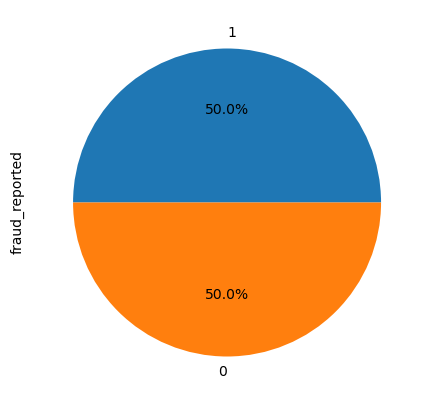

In [54]:
y_new['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

From the above chart we can see that the data is balanced

Data Standardization

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)
sc_x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,Year,Day
0,1.121349,1.057651,1.369938,0.233531,-0.216087,0.667988,-0.564387,-0.524185,1.251234,0.643649,...,0.648297,-0.266055,1.120932,0.680825,0.964858,-1.742164,-0.164977,1.143702,1.821322,0.149098
1,0.204944,0.365922,0.093251,0.233531,1.517509,-0.248904,1.952229,-0.491459,1.251234,0.643649,...,-2.052898,-1.495489,-1.505820,-2.077532,0.438381,-0.682590,0.367047,-0.112160,0.654932,1.355013
2,-0.656477,-1.132826,1.369938,-1.069052,1.517509,0.695230,1.952229,-1.108501,-0.799211,1.734016,...,-0.852096,-0.010728,-0.846986,-0.964989,-0.614573,1.051260,0.367047,-0.112160,-0.219860,-0.815634
3,0.461537,0.250633,-1.183437,0.233531,1.517509,0.706598,2.109917,1.553912,-0.799211,1.734016,...,0.315011,-0.302531,-0.312622,0.603589,-0.877811,1.436559,1.608435,-0.426126,-1.677847,1.113830
4,0.204944,0.596498,-1.183437,1.536114,-0.216087,1.441940,2.109917,1.588633,1.251234,-1.537083,...,-1.994847,-1.383917,-1.533719,-2.018469,-1.667527,1.147585,0.721729,-0.112160,1.821322,-1.177409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.280751,-0.556385,0.093251,0.233531,-0.150210,0.155133,0.396037,0.086781,-0.799211,-0.991900,...,0.073633,-0.114575,0.568541,-0.017028,0.438381,0.088010,0.721729,-1.368023,-0.365658,0.872647
1502,2.230199,2.556399,0.093251,-1.069052,-0.094735,0.487782,-0.564387,1.424688,-0.799211,0.098466,...,0.454537,-0.286224,0.626484,0.545945,0.964858,-1.742164,1.076412,-0.426126,0.800731,0.993239
1503,-0.143290,-0.556385,-1.183437,-1.069052,-0.448389,0.816521,-0.564387,-0.454042,-0.799211,-0.446717,...,0.987793,2.420246,0.911693,0.500058,-0.351334,-0.104640,0.189706,1.457667,0.363335,1.596196
1504,-0.189110,-0.095232,0.093251,-1.069052,-1.082885,1.243823,0.492749,-0.594211,-0.799211,-0.991900,...,1.711441,1.711552,1.701864,1.490897,-1.141050,1.532884,0.012364,0.829736,0.800731,1.113830


Most of the features are co related to each other so we will use PCA to avoid multi colonearity

PCA

In [56]:
from sklearn.decomposition import PCA
testPCA=PCA()
Y=testPCA.fit(sc_x)

Checking the cumulative sum of the expalined variance ratio

In [57]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 10.06229547,  15.41328157,  20.06616545,  24.46375396,
        28.03604095,  31.42690854,  34.66964487,  37.82917568,
        40.92512103,  43.91808309,  46.8309708 ,  49.72819342,
        52.61106115,  55.45516651,  58.17391244,  60.83433404,
        63.43306258,  65.9438561 ,  68.40711697,  70.81457919,
        73.20838954,  75.56260615,  77.82994936,  80.04700803,
        82.223298  ,  84.36555051,  86.47164242,  88.50701583,
        90.4464142 ,  92.37797931,  94.22365678,  95.99167557,
        97.65884429,  98.82726323,  99.43201063,  99.81481658,
        99.99999394, 100.        ])

The variance above shows the number of components in relation to the data we will get. We take 32 components with a variation rate of 95.96%

In [58]:
FinalPCA=PCA(n_components=32)
final_x=FinalPCA.fit_transform(sc_x)
finalx=pd.DataFrame(final_x)

finalx

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.199359,1.294967,0.843680,2.860118,-2.783590,-0.950898,1.672823,0.014479,-0.296617,-0.639924,...,-0.148078,-1.835192,-0.377502,0.328777,-0.893974,1.423717,-0.965878,1.062186,0.549329,0.488818
1,4.203072,0.641430,0.379824,-0.464545,0.139885,-0.888699,0.482909,-0.493735,1.245562,-0.622192,...,0.417365,-0.866807,0.798970,-0.684145,-0.202105,-0.015504,0.482546,1.323904,-0.764480,-0.017209
2,0.989890,-1.104291,-1.277672,-0.501669,1.632777,2.048544,0.340612,-1.074066,-0.013221,0.272221,...,0.045352,1.607102,0.656803,1.350267,-0.593576,-0.279910,0.127013,0.522909,-0.001606,-1.570257
3,-0.041741,1.076192,0.954820,-2.498935,3.348033,1.510330,2.410198,0.135381,-0.547664,-0.542794,...,0.252255,-1.807494,-0.394813,1.360754,0.437404,0.056971,-0.438104,-1.087327,0.364437,-1.074717
4,3.541177,1.300105,0.359831,-1.908593,1.177925,2.329836,-1.869748,2.343281,0.252065,-0.133142,...,0.034925,-1.642055,-0.469316,-0.824486,2.368622,1.012578,0.112897,-0.850931,0.856071,0.489444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.601004,-0.625922,-0.783012,-0.612893,0.595898,-0.874172,-1.605753,0.355877,0.198134,0.112085,...,0.643734,-0.589736,-0.721395,-0.318785,0.250515,0.047593,-0.122210,-0.072100,-1.130921,0.242321
1502,-1.824480,3.247614,-2.193191,-0.902181,-0.502779,-0.967416,0.238518,0.332975,1.055026,0.153743,...,0.389531,-0.955279,-0.699928,-0.915764,-0.317391,-0.214928,-1.269172,-0.587642,0.477422,0.076925
1503,-2.281316,-0.607868,1.976503,0.030717,-0.475995,-1.047932,-0.164259,1.407447,0.881172,-0.522801,...,0.182090,1.721969,-0.267114,1.204628,0.540602,0.752451,-0.596748,0.133247,-0.064801,-0.751376
1504,-3.180995,-0.545440,2.445115,-1.157038,0.622931,-0.012834,-1.981068,-0.145482,0.072649,-0.661535,...,-0.594384,-0.985432,-0.134059,0.097154,-0.002083,-0.096996,0.392349,-0.229262,-0.145230,-0.422251


Above shown is our final dataset after the PCA.

reassign x to finalx

In [59]:
x=finalx
x

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.199359,1.294967,0.843680,2.860118,-2.783590,-0.950898,1.672823,0.014479,-0.296617,-0.639924,...,-0.148078,-1.835192,-0.377502,0.328777,-0.893974,1.423717,-0.965878,1.062186,0.549329,0.488818
1,4.203072,0.641430,0.379824,-0.464545,0.139885,-0.888699,0.482909,-0.493735,1.245562,-0.622192,...,0.417365,-0.866807,0.798970,-0.684145,-0.202105,-0.015504,0.482546,1.323904,-0.764480,-0.017209
2,0.989890,-1.104291,-1.277672,-0.501669,1.632777,2.048544,0.340612,-1.074066,-0.013221,0.272221,...,0.045352,1.607102,0.656803,1.350267,-0.593576,-0.279910,0.127013,0.522909,-0.001606,-1.570257
3,-0.041741,1.076192,0.954820,-2.498935,3.348033,1.510330,2.410198,0.135381,-0.547664,-0.542794,...,0.252255,-1.807494,-0.394813,1.360754,0.437404,0.056971,-0.438104,-1.087327,0.364437,-1.074717
4,3.541177,1.300105,0.359831,-1.908593,1.177925,2.329836,-1.869748,2.343281,0.252065,-0.133142,...,0.034925,-1.642055,-0.469316,-0.824486,2.368622,1.012578,0.112897,-0.850931,0.856071,0.489444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.601004,-0.625922,-0.783012,-0.612893,0.595898,-0.874172,-1.605753,0.355877,0.198134,0.112085,...,0.643734,-0.589736,-0.721395,-0.318785,0.250515,0.047593,-0.122210,-0.072100,-1.130921,0.242321
1502,-1.824480,3.247614,-2.193191,-0.902181,-0.502779,-0.967416,0.238518,0.332975,1.055026,0.153743,...,0.389531,-0.955279,-0.699928,-0.915764,-0.317391,-0.214928,-1.269172,-0.587642,0.477422,0.076925
1503,-2.281316,-0.607868,1.976503,0.030717,-0.475995,-1.047932,-0.164259,1.407447,0.881172,-0.522801,...,0.182090,1.721969,-0.267114,1.204628,0.540602,0.752451,-0.596748,0.133247,-0.064801,-0.751376
1504,-3.180995,-0.545440,2.445115,-1.157038,0.622931,-0.012834,-1.981068,-0.145482,0.072649,-0.661535,...,-0.594384,-0.985432,-0.134059,0.097154,-0.002083,-0.096996,0.392349,-0.229262,-0.145230,-0.422251


In [60]:
y=y_new
x.shape,y.shape

((1506, 32), (1506, 1))

Building Model

Importing requiered  Libraries

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

Checking the best possible random state to train our model

In [62]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8278145695364238  on Random state 130


Train Test Split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=130)

In [64]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression()
0.7851458885941645
[[158  49]
 [ 32 138]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       207
           1       0.74      0.81      0.77       170

    accuracy                           0.79       377
   macro avg       0.78      0.79      0.78       377
weighted avg       0.79      0.79      0.79       377

Accuracy score of SVC(probability=True)
0.8461538461538461
[[177  30]
 [ 28 142]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       207
           1       0.83      0.84      0.83       170

    accuracy                           0.85       377
   macro avg       0.84      0.85      0.84       377
weighted avg       0.85      0.85      0.85       377

Accuracy score of KNeighborsClassifier()
0.6445623342175066
[[ 74 133]
 [  1 169]]
              precision    recall  f1-score   support

           0       0.99      0.36      0.52  

From the above we can observe that RandonForest has performed well with 84% accuracy.

Checking the Underfitting or Overfitting of the model using Cross Validation

In [65]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('xxxxx')

Mean Accuracy of LogisticRegression()
0.7530923412026137
xxxxx
Mean Accuracy of SVC(probability=True)
0.8135662581681371
xxxxx
Mean Accuracy of KNeighborsClassifier()
0.6753404765571714
xxxxx
Mean Accuracy of RandomForestClassifier()
0.8095531451453214
xxxxx
Mean Accuracy of DecisionTreeClassifier()
0.7265186684561395
xxxxx
Mean Accuracy of GaussianNB()
0.7829948736001408
xxxxx
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7763481551561021
xxxxx


RandomForestClassifier is the best as per the mean of the acuraccy.